# Clustering

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [59]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [60]:
df = pd.read_csv('train_cleaned_v.1.csv')

In [61]:
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,AwNmExWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,ratingMean
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,40,0.0,779,1,10,1,...,0,False,True,False,1,0,781,['US'],"Action,Adventure,Animation",7.5
1,Looping,"(5, 6]",1982,NaN,28,0.0,11,1,10,1,...,0,False,True,False,1,0,11,['XWG'],Action,5.5
2,Idealnaya para,"(5, 6]",1992,NaN,92,0.0,38,1,10,1,...,0,False,True,False,1,1,38,['RU'],Comedy,5.5
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,53,0.0,15,1,10,22,...,0,True,True,False,1,0,15,['MX'],Reality-TV,5.5
4,Seutateueob,"(7, 8]",2020,2020.0,80,1.0,15718,1,10,347,...,1,True,True,False,32,452,15746,['KR'],"Comedy,Drama,Romance",7.5


#### Fill missing values and convert to numerical (where possible)

In [62]:
df.dtypes

originalTitle          object
rating                 object
startYear               int64
endYear               float64
runtimeMinutes          int64
awardWins             float64
numVotes                int64
worstRating             int64
bestRating              int64
totalImages             int64
totalVideos             int64
totalCredits            int64
criticReviewsTotal      int64
titleType              object
AwNmExWins              int64
canHaveEpisodes          bool
isRatable                bool
isAdult                  bool
numRegions              int64
userReviewsTotal        int64
ratingCount             int64
countryOfOrigin        object
genres                 object
ratingMean            float64
dtype: object

In [63]:
del df['originalTitle']
del df['rating']
del df['titleType']
del df['countryOfOrigin']
del df['genres']
del df['isAdult']
del df['isRatable']
del df['canHaveEpisodes']

In [64]:
del df['endYear']
del df['awardWins'] #HA DEI VALORI MANCANTI, VEDIAMO COSA FARNE

In [65]:
df.head()

,startYear,runtimeMinutes,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,numRegions,userReviewsTotal,ratingCount,ratingMean
0,1995,40,779,1,10,1,0,21,1,0,1,0,781,7.5
1,1982,28,11,1,10,1,0,1,0,0,1,0,11,5.5
2,1992,92,38,1,10,1,0,24,0,0,1,1,38,5.5
3,2021,53,15,1,10,22,0,56,0,0,1,0,15,5.5
4,2020,80,15718,1,10,347,2,47,4,1,32,452,15746,7.5


In [66]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df)
#train_data = pd.DataFrame(train_data, columns=df.columns)
#train_data.head()


In [67]:
#train_data.isnull().sum()

In [68]:
#del train_data['awardWins']
#train_data.head()

In [69]:
%%time
sse_list = []
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))

CPU times: total: 6min 1s
Wall time: 3min 43s


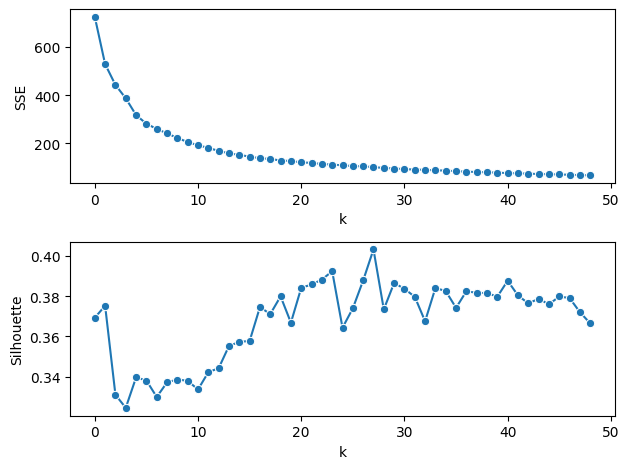

In [70]:
fig, axs = plt.subplots(2) # 1 row, 2 columns

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')
sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout() # Adjust the padding between and around subplots

### Analysis by centroid-based methods

- K-Means (mandatory), Bisecting K-Means (optional), X-Means (optional);

- Choice the attributes, identify the best value of k, discuss the clusters.

### Analysis by density-based clustering

- DBSCAN (mandatory), OPTICS (optional);

- Choice the attributes, identify the best parameter configuration, discuss clusters.

### Analysis by hierarchical clustering

- Choice the attributes, the distance function, analyse several dendrograms.

### Final discussion

- Which is the best algorithm? Remember that best is studied w.r.t. several aggregate 
statistics, cluster distributions and w.r.t. the typology of algorithm used for that 
particular dataset;
